## Notebook for going from the kwik files (kwd/kwe/kwik) to rasters
Uses:
    - intan2kwik (https://github.com/zekearneodo/intan2kwik/blob/master/README.md)
    - mountainlab suite(https://github.com/flatironinstitute/mountainlab-js)
    - mountainsort https://github.com/flatironinstitute/mountainsort_examples/blob/master/README.md
    - mountainsort examples https://github.com/flatironinstitute/mountainsort_examples/blob/master/README.md

In [1]:
import socket
import os
import glob
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from importlib import reload


import logging

# Setup the logger
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')

ch = logging.StreamHandler()
ch.setLevel(logging.INFO)
ch.setFormatter(formatter)
logger.addHandler(ch)
        
logger.info('Logger set')
logger.info('Hostname {}'.format(socket.gethostname()))


from pipefinch.pipeline import rigutil
from pipefinch.pipeline import filestructure as et


from pipefinch.h5tools.kwik import kutil
from pipefinch.h5tools.kwik import event as ev

from pipefinch.h5tools.kwik import kwikfunctions as kwkf
from pipefinch.h5tools.kwik import kwdfunctions as kwdf

from pipefinch.neural.postsort import session
       

2019-08-02 10:17:05,379 - root - INFO - Logger set
2019-08-02 10:17:05,380 - root - INFO - Hostname zpikezorter


### Session parameters and raw files

In [7]:
# session parameters
sess_par = {'bird': 'p14r14',
           'sess': '2019-02-15_3125_01', 
           'probe': 'probe_0',
           'sort': '1',}

# visualization default parameters
viz_par = { 'evt_name': 'motif',
           'evt_signal': 'trig_perceptron',
            'evt_edge': 1,
            'pre_ms': -500,
            'post_ms': 1500,
            
            'pre_samples': 0,
            'post_samples': 0,
            'span': 0,
            }

exp_struct = et.get_exp_struct(sess_par['bird'], sess_par['sess'], sess_par['sort'])

logger.info('Raw folder {}'.format(exp_struct['folders']['raw']))

kwik_folder = exp_struct['folders']['kwik']
kwd_path = exp_struct['files']['kwd']
exp_struct

2019-08-02 10:22:15,730 - root - INFO - Raw folder /mnt/microdrive/birds/p14r14/Ephys/raw/2019-02-15_3125_01


{'folders': {'raw': '/mnt/microdrive/birds/p14r14/Ephys/raw/2019-02-15_3125_01',
  'kwik': '/data/experiment/microdrive/p14r14/Ephys/kwik/2019-02-15_3125_01',
  'msort': '/data/experiment/microdrive/p14r14/Ephys/msort/2019-02-15_3125_01',
  'ksort': '/data/experiment/microdrive/p14r14/Ephys/ksort/2019-02-15_3125_01'},
 'files': {'par': '/data/experiment/microdrive/p14r14/Ephys/ksort/2019-02-15_3125_01/params.json',
  'set': '/mnt/microdrive/birds/p14r14/Ephys/raw/2019-02-15_3125_01/settings.isf',
  'rig': '/mnt/microdrive/birds/p14r14/Ephys/raw/2019-02-15_3125_01/rig.json',
  'kwd': '/data/experiment/microdrive/p14r14/Ephys/kwik/2019-02-15_3125_01/streams.kwd',
  'kwik': '/data/experiment/microdrive/p14r14/Ephys/kwik/2019-02-15_3125_01/sort_1/spikes.kwik',
  'kwe': '/data/experiment/microdrive/p14r14/Ephys/kwik/2019-02-15_3125_01/events.kwe',
  'mda_raw': '/data/experiment/microdrive/p14r14/Ephys/msort/2019-02-15_3125_01/raw.mda',
  'bin_raw': '/data/experiment/microdrive/p14r14/Ephys/

### instantiate a session object

In [8]:
reload(session)

<module 'pipefinch.neural.postsort.session' from '/home/ezequiel/repos/pipefinch/pipefinch/neural/postsort/session.py'>

In [9]:
sess = session.Session(sess_par, viz_par)
sess.load_rig_par()
sess.load_mic_peri_event_streams()

2019-08-02 10:26:58,690 - pipefinch.neural.postsort.session - INFO - 2000.0
/home/ezequiel/repos/pipefinch/pipefinch/util/spectral.py:19: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Sxx[[Sxx < np.max((Sxx) * 0.000055)]] = 1


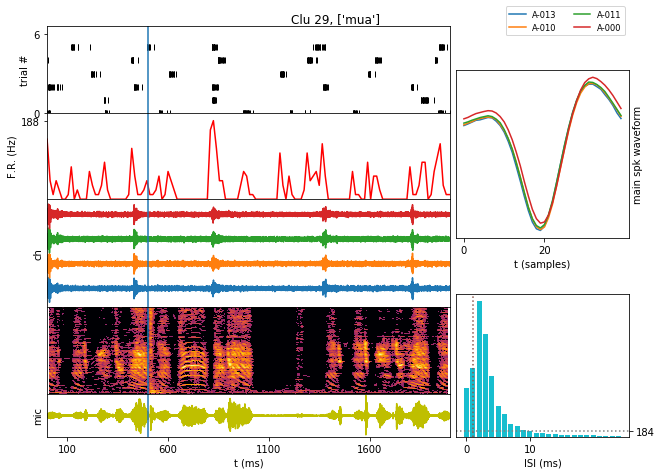

In [15]:
from pipefinch.neural import basic_plot as bp
reload(bp)
reload(session)
from pipefinch.util import spectral

fig = session.plot_unit(sess, 29, example_event_id=2);

2019-08-02 10:27:48,129 - pipefinch.neural.postsort.session - INFO - 2000.0
2019-08-02 10:27:50,435 - pipefinch.neural.postsort.session - INFO - 1987.0


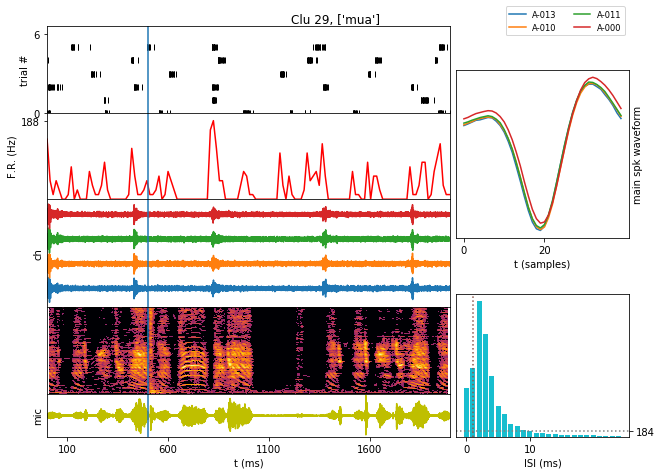

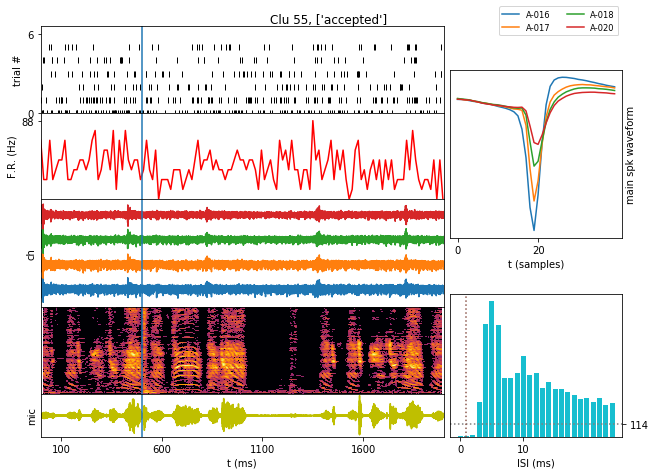

In [16]:
reload(session)
session.plot_all_units(sess, only_tags = ['accepted', 'mua'], example_event_idx=2)

In [24]:
reload(units)

<module 'pipefinch.neural.units' from '/home/zinch/repos/pipefinch/pipefinch/neural/units.py'>

In [50]:
a_unit = units.Unit(8, sess.kwik_path, sess.kwd_path, port=sess.probe_port)
a_unit.get_time_stamps()
a_unit.get_attrs()
a_unit.get_unit_chan_names()
a_unit.get_unit_main_chans_names()

2019-02-27 13:04:28,869 - pipefinch.neural.units - WARNING - You are getting channel locations from one rec and using for all, mind that this only works if all recs have the same setting


array(['D-006', 'D-004', 'D-007', 'D-008'], dtype='<U6')

# DEBUG VIEWING UNITS

In [21]:
from pipefinch.neural import units
reload(kwdf)
reload(units)

a_unit = units.Unit(54, sess.kwik_path, sess.kwd_path)
t, r = a_unit.get_time_stamps()
a_unit.get_unit_spikes()

plt.plot(t)
plt.figure()
plt.plot(r)

KeyError: "Unable to open object (object '54' doesn't exist)"

In [ ]:
units.Unit(7, sess.kwik_path, sess.kwd_path).get_unit_spikes()

In [ ]:
reload(kwdf)

spk_arr = kwdf.collect_frames_fast(sess.kwd_path, r,  t-20,40, np.arange(32))

In [ ]:
spk_arr.shape

In [ ]:
sample = np.empty(0)
try:
    assert sample.size > 0, "no valid events"
except AssertionError as err:
    print(err.args)


In [ ]:
# get all unit waveforms in parallel
reload(units)
units.get_all_unit_waveforms(sess.kwik_path, sess.kwd_path)

In [ ]:
import h5py
kwkfile = h5py.File(sess.kwik_path, 'r')

r_path = "/channel_groups/0/spikes/recording"
clu_path = "/channel_groups/0/spikes/clusters/main"
t_path = '/channel_groups/0/spikes/time_samples'

recs = kwkfile[r_path][:]
clu = kwkfile[clu_path][:]
times = kwkfile[t_path][:]

In [ ]:
kwkfile.close()

In [ ]:
np.unique(recs)

In [ ]:
kwkfile['/channel_groups/0/spikes/clusters/main'][:]

In [ ]:
probe = {}
probe['a1x32-edge-5mm-20-177_H32'] = {i+1: (0, i*20) for i in range(32)}


# port_site maps
# each port is a dict {port: site}, where port is an int, site is an int
# port is

headstage = {}
headstage['intan-32-nn32'] = {23: 15, 22: 6, 21: 5, 20: 4, 19: 16, 18: 3, 17: 2, 16: 1,
                            15: 32, 14: 31, 13: 30, 12: 17, 11: 29, 10: 28, 9: 27, 8: 18,
                            24: 13, 25: 12, 26: 11, 27: 10, 28: 14, 29: 9, 30: 8, 31: 7,
                            0: 26, 1: 25, 2: 24, 3: 19, 4: 23, 5: 22, 6: 21, 7: 20}

def make_map(a_probe: dict, a_headstage: dict):
    # want to retrieve what coordinates are in each port of the headstage
    # headstage is {port: site}, probe is {site: coords}
    port_coords = {port: np.array(a_probe[site]) for port, site in sorted(a_headstage.items())}
    return (list(port_coords.values()))
    
np.vstack(make_map(probe['a1x32-edge-5mm-20-177_H32'], headstage['intan-32-nn32']))

In [ ]:
def site_port_map(probe_name: str, headstage_name: str):
    a_probe = probe[probe_name]
    a_headstage = headstage[headstage_name]

    return [h_port for site in a_probe.keys() for h_port, h_site in a_headstage.items() if h_site==site]

site_port_map('a1x32-edge-5mm-20-177_H32', 'intan-32-nn32')

In [23]:
import os